In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics

%matplotlib inline

In [2]:
cars_flag = False
if cars_flag:
    src = '../cars/car.data'
    import warnings
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
else:
    src = '../adult/data.txt'
data = pd.read_csv(src, index_col=0)

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,61,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Germany,>50K
1,37,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,15024,0,40,United-States,>50K
2,50,Private,1st-4th,2,Married-spouse-absent,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
3,38,Private,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K
4,56,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Black,Female,0,0,38,United-States,<=50K


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
# Set data set specific settings for template

mappings = {}
cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'class']
if cars_flag:
    scoring = metrics.make_scorer(metrics.matthews_corrcoef)    
    for i in data.columns:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)
else:
    scoring = 'accuracy'    
    for i in cols:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)

In [6]:
X = data.loc[:,data.columns != 'class']
y = data.iloc[:,-1]

In [7]:
print(X.shape)
print(y.shape)

(3000, 13)
(3000,)


In [8]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
vscore = []
sse = []

for i in range(1,8):
    km = KMeans(n_clusters=i, max_iter=n_iter, n_jobs=-1)
    km.fit(X)
    sse.append(km.score(X))
    y_pred = km.predict(X)
    vscore.append(metrics.v_measure_score(y, y_pred))

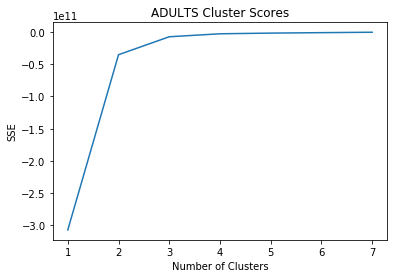

In [12]:
plt.title("ADULTS Cluster Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(range(1,8), sse)

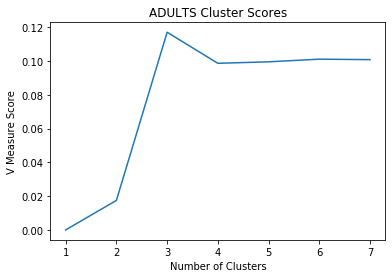

In [13]:
plt.title("ADULTS Cluster Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("V Measure Score")
plt.plot(range(1,8), vscore)

In [14]:
score = []
totals= []
for n_iter in (300,600):
    for i in range(1,8):
        km = KMeans(n_clusters=i, max_iter=n_iter, n_jobs=-1)
        km.fit(X)
        y_pred = km.predict(X)
        score.append(metrics.v_measure_score(y, y_pred))
    totals.append(score)
    score = []

In [15]:
totals

[[-2.562741203051941e-15,
  0.017460578975622216,
  0.11699688071595374,
  0.09861496039896257,
  0.09948961111716413,
  0.10105630831597126,
  0.10078290625382194],
 [-2.562741203051941e-15,
  0.017460578975622216,
  0.11699688071595374,
  0.09861496039896257,
  0.09948961111716413,
  0.10105630831597126,
  0.10078290625382194]]

In [16]:
score = []
totals= []
for inits in (10,20, 30):
    for i in range(1,8):
        km = KMeans(n_clusters=i, n_init=inits, n_jobs=-1)
        km.fit(X)
        y_pred = km.predict(X)
        score.append(metrics.v_measure_score(y, y_pred))
    totals.append(score)
    score = []

In [17]:
totals

[[-2.562741203051941e-15,
  0.017460578975622216,
  0.11699688071595374,
  0.09861496039896257,
  0.09948961111716413,
  0.10105630831597129,
  0.10078290625382193],
 [-2.562741203051941e-15,
  0.017460578975622216,
  0.11699688071595371,
  0.09861496039896256,
  0.09948961111716413,
  0.10105630831597127,
  0.10078290625382194],
 [-2.562741203051941e-15,
  0.017460578975622216,
  0.11699688071595374,
  0.09861496039896257,
  0.09948961111716413,
  0.10105630831597126,
  0.10078290625382194]]

In [18]:
score = []
totals= []
for tols in (.0001,.00001, .000001):
    for i in range(1,8):
        km = KMeans(n_clusters=i, n_init=inits, n_jobs=-1)
        km.fit(X)
        y_pred = km.predict(X)
        score.append(metrics.v_measure_score(y, y_pred))
    totals.append(score)
    score = []

In [19]:
totals

[[-2.562741203051941e-15,
  0.017460578975622216,
  0.11699688071595374,
  0.09861496039896257,
  0.09948961111716413,
  0.10105630831597126,
  0.10078290625382194],
 [-2.562741203051941e-15,
  0.017460578975622216,
  0.11699688071595371,
  0.09861496039896257,
  0.09948961111716413,
  0.10105630831597125,
  0.10078290625382194],
 [-2.562741203051941e-15,
  0.017460578975622216,
  0.11699688071595374,
  0.09861496039896257,
  0.09948961111716413,
  0.10105630831597126,
  0.10078290625382194]]